In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 2. 특정 폴더 경로 지정
folder_path = '/content/drive/MyDrive/DMS/phone_detection_results/resized_0427'

# 3. 폴더 내 엑셀 파일들 불러오기
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

In [ ]:
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)

    # 파일명에서 확장자(.xlsx 등) 제거하고, 변수 이름에 사용할 수 있도록 변환
    var_name = os.path.splitext(file)[0]
    if var_name.startswith('DMD_'):
        var_name = var_name[4:]  # 'DMD_' 글자 수만큼 자르기

    # "_detection" 제거
    if var_name.endswith('_detection'):
        var_name = var_name[:-10]  # '_detection' 글자 수만큼 자르기

    var_name = var_name.replace(' ', '_').replace('-', '_')  # 공백, 하이픈 등 처리

    # 동적으로 변수 생성
    globals()[var_name] = df

In [ ]:
excel_files

['DMD_normal_mirror_detection.xlsx',
 'DMD_yawn_dash_detection.xlsx',
 'DMD_yawn_mirror_detection.xlsx',
 'DMD_normal_dmd_detection.xlsx',
 'DMD_phonecall_dmd_detection.xlsx',
 'DMD_text_dmd_detection.xlsx',
 'DMD_yawn_dmd_detection.xlsx']

In [ ]:
normal_mirror.head(2)

,label,video_name,frame,Phone_Detected
0,normal,1-FemaleNoGlasses-Yawning-clip-1,frame000000.jpg,0
1,normal,1-FemaleNoGlasses-Yawning-clip-1,frame000001.jpg,0


In [ ]:
phonecall_dmd['Phone_Detected'].value_counts(normalize=True)

,proportion
Phone_Detected,
1.0,0.950412
0.0,0.049588


In [ ]:
df_list = [
    ('normal_mirror', normal_mirror),
    ('yawn_dash', yawn_dash),
    ('yawn_mirror', yawn_mirror),
    ('normal_dmd', normal_dmd),
    ('text_dmd', text_dmd),
    ('yawn_dmd', yawn_dmd),
    ('phonecall_dmd', phonecall_dmd)
]

<Figure size 2000x400 with 0 Axes>

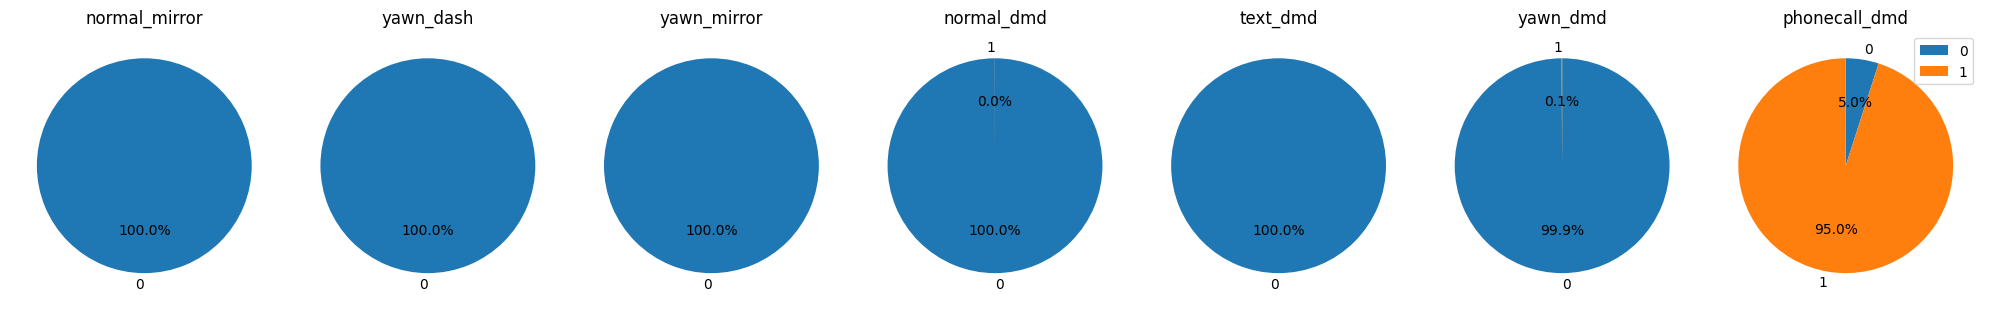

In [ ]:
plt.figure(figsize=(20, 4))
fig, axes = plt.subplots(1, 7, figsize=(20, 10))
for ax, (name, df) in zip(axes, df_list):
    try :
        ratio_0 = df['Phone_Detected'].value_counts(normalize=True)[0]
        ratio_1 = df['Phone_Detected'].value_counts(normalize=True)[1]
        labels = ['0', '1']
        ax.pie([ratio_0, ratio_1], labels = labels, autopct='%.1f%%', startangle = 90, counterclock=False)
    except :
        labels = ['0']
        ax.pie([ratio_0], labels = labels, autopct='%.1f%%', startangle = 90, counterclock=False)
    ax.set_title(name)

plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
phonecall_dmd.head(2)

,label,video_name,frame,Phone_Detected
0,phonecall,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_1.avi,frame000000.jpg,0.0
1,phonecall,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_1.avi,frame000001.jpg,0.0


In [ ]:
aa = phonecall_dmd.groupby(by = 'video_name')['Phone_Detected'].value_counts(normalize = True).reset_index()
aa['proportion'] = round(aa['proportion'], 2)
aa.head(2)

,video_name,Phone_Detected,proportion
0,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_0.avi,1.0,0.98
1,gA-1(File1)_s2_face_2019-03-08-09;21;03_1_0.avi,0.0,0.02


In [ ]:
# 1. 비율 데이터 가져오기
aa = phonecall_dmd.groupby('video_name')['Phone_Detected'].value_counts(normalize=True).rename('proportion').reset_index()
aa['proportion'] = round(aa['proportion'], 2)
df_detected = aa[aa['Phone_Detected'] == 1]
proportions = df_detected['proportion']
proportions

,proportion
0,0.98
2,0.98
4,0.93
6,0.99
8,0.98
...,...
334,0.89
336,0.98
338,0.98
340,0.98


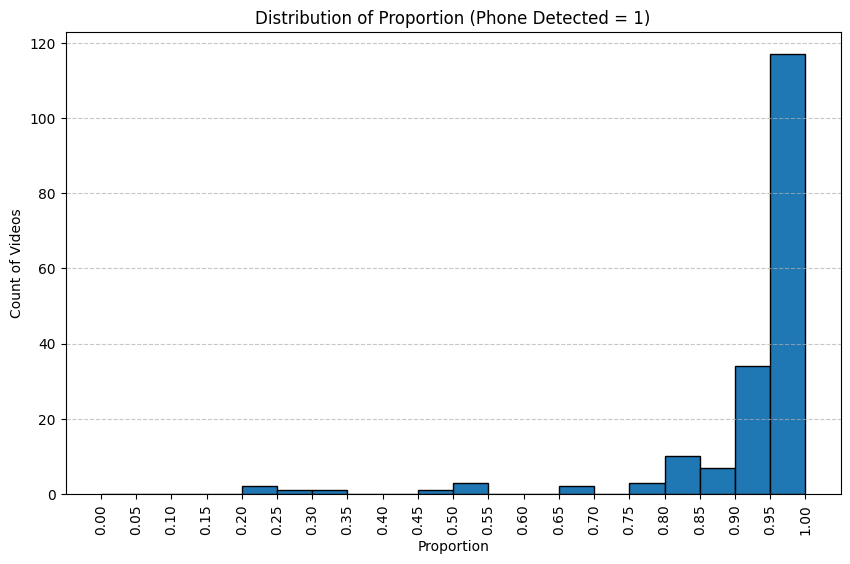

In [ ]:
# 2. 히스토그램 그리기
bins = np.arange(0, 1.05, 0.05)

plt.figure(figsize=(10,6))
plt.hist(proportions, bins=bins, edgecolor='black', align='mid')
plt.xticks(bins, rotation=90)
plt.xlabel('Proportion')
plt.ylabel('Count of Videos')
plt.title('Distribution of Proportion (Phone Detected = 1)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
bb = phonecall_dmd.groupby('video_name')['Phone_Detected'].value_counts(normalize=True).reset_index()
ratio_zero = bb[bb['Phone_Detected']==0]
ratio_zero_sort = ratio_zero.sort_values(by = 'proportion', ascending = True)
ratio_zero_sort

,video_name,Phone_Detected,proportion
111,gE-27(File17)_s2_face_2019-03-07-13;05;11_27_0...,0.0,0.003448
275,gZ-34(File28)_s4_face_2019-04-02-10;01;53_34_0...,0.0,0.005277
181,gF-24(File23)_s4_face_2019-03-25-14;55;37_24_6...,0.0,0.005495
315,gZ-35(File29)_s4_face_2019-04-03-10;30;28_35_6...,0.0,0.005618
280,gZ-34(File28)_s4_face_2019-04-02-10;01;53_34_3...,0.0,0.006466
...,...,...,...
66,gB-7(File7)_s4_face_2019-03-22-10;42;09_7_0.avi,0.0,0.653846
171,gF-24(File23)_s4_face_2019-03-25-14;55;37_24_0...,0.0,0.750000
326,gZ-36(File30)_s4_face_2019-04-03-15;01;29_36_2...,0.0,0.777778
199,gF-25(File24)_s4_face_2019-03-20-10;29;08_25_5...,0.0,0.800000
